<a href="https://colab.research.google.com/github/Udhayaswathi7/respiratory/blob/main/True_and_fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRUE AND FAKE NEWS PREDICTION**

In [42]:
import numpy as nd
import pandas as pd

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#LOADING OF DATA

In [44]:
train = pd.read_csv('/content/drive/MyDrive/True and fake news prediction/train.csv')

In [45]:
test= pd.read_csv('/content/drive/MyDrive/True and fake news prediction/test.csv')

#DATA STRUCTURE AND CONTENT

In [46]:
train.shape
#returns a tuple value that indicates the dimensions of a Python object.

(20800, 5)

In [47]:
test.shape
#returns a tuple value that indicates the dimensions of a Python object.

(5200, 4)

In [48]:
train.info()
#info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [49]:
train.isnull().sum()
#returns the number of missing values in each column of the DataFrame.

,0
id,0
title,558
author,1957
text,39
label,0


In [50]:
train.describe()
#describe() method generates descriptive statistics of the DataFrame.

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [51]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [52]:
test.info()
#info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [53]:
test.isnull().sum()
#returns the number of missing values in each column of the DataFrame.

,0
id,0
title,122
author,503
text,7


In [54]:
test.describe()
#describe() method generates descriptive statistics of the DataFrame.

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [55]:
test.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


#TEXT PREPROCESSING

In [56]:
train=train.fillna(' ')
#This updates the DataFrame or Series train by replacing all missing values with a space ' '.

In [57]:
train.isnull().sum()
#returns the number of missing values in each column of the DataFrame.

,0
id,0
title,0
author,0
text,0
label,0


In [58]:
train['subject']=train['author'] + '' + train ['title']
#This creates a new column named subject in the train and assigns the concatenated values to it.

In [59]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [60]:
test=test.fillna(' ')
#This updates the DataFrame or Series test by replacing all missing values with a space ' '.

In [61]:
test.isnull().sum()
#returns the number of missing values in each column of the DataFrame.

,0
id,0
title,0
author,0
text,0


In [62]:
test['subject']=test['author'] + '' + test ['title']
#This creates a new column named subject in the test data and assigns the concatenated values to it.

#TOKENIZATION

In [63]:
#This imports the NLTK library
import nltk
nltk.download('punkt')
#This command downloads the punkt tokenizer models. These models are used by NLTK’s tokenizer functions to split text into tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize
# Apply the word_tokenize function to each entry in the 'subject' column
# This operation splits the text in 'subject' into individual words (tokens)
# and stores the result in a new column called 'tokens'
train['tokens'] = train['subject'].apply(word_tokenize)

In [65]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [66]:
train['subject']=train['author'] + train['title']
#This creates a new column named subject in the train data and assigns the concatenated values to it.

In [67]:
# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize
# Apply the word_tokenize function to each entry in the 'subject' column
# This operation splits the text in 'subject' into individual words (tokens)
# and stores the result in a new column called 'tokens'
test['tokens'] = test['subject'].apply(word_tokenize)


In [68]:
test.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...,"[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists n...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


LOWERING THE CASE TEXT

In [69]:
train['subject']= train['subject'].str.lower()
# Convert all text in the 'subject' column to lowercase
# This helps in standardizing text data for consistency and better analysis
# By converting text to lowercase, variations like 'Hello' and 'hello' will be treated as the same word

In [70]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [71]:
train['subject']= test['subject'].str.lower()
# Convert all text in the 'subject' column to lowercase
# This helps in standardizing text data for consistency and better analysis
# By converting text to lowercase, variations like 'Hello' and 'hello' will be treated as the same word

In [72]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,david streitfeldspecter of trump loosens tongu...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,russian warships ready to strike terrorists n...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,common dreams#nodapl: native american leaders ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,daniel victortim tebow will attempt another co...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,truth broadcast networkkeiser report: meme war...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [73]:
test['subject']= test['subject'].str.lower()
# Convert all text in the 'subject' column to lowercase
# This helps in standardizing text data for consistency and better analysis
# By converting text to lowercase, variations like 'Hello' and 'hello' will be treated as the same word

In [74]:
test.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeldspecter of trump loosens tongu...,"[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists n...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: native american leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victortim tebow will attempt another co...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeiser report: meme war...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


#REMOVING THE PUNCTUATION

In [75]:
# Remove all non-alphanumeric characters (excluding whitespace) from the 'subject' column
# The regular expression '[^\w\s]' matches any character that is not a word character (\w) or whitespace (\s)
# These characters will be replaced with an empty string (i.e., they will be removed)
train['subject']=train['subject'].str.replace('[^\w\s]','')

In [76]:
# Remove all non-alphanumeric characters (excluding whitespace) from the 'subject' column
# The regular expression '[^\w\s]' matches any character that is not a word character (\w) or whitespace (\s)
# These characters will be replaced with an empty string (i.e., they will be removed)
test['subject']=test['subject'].str.replace('[^\w\s]','')

#REMOVAL OF STOP WORDS

In [77]:
# Download the 'stopwords' dataset from NLTK
# Stopwords are common words that are often excluded from text analysis
# because they usually do not provide significant meaning or value
# for tasks such as text classification, sentiment analysis, or word frequency counts
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Load the list of English stopwords from NLTK and convert it to a set
sw=set(nltk.corpus.stopwords.words('english'))
# Print the set of stopwords
print(sw)

{'ours', "you'd", 'for', 'mightn', 'your', 'over', 'hadn', 'most', 'yourself', 'shouldn', "haven't", 'our', 'until', 'just', 'it', "isn't", 'do', 'll', 'only', 'as', "didn't", 'his', 'myself', 'at', 'ma', "you'll", 'm', 'against', 'that', "it's", "shan't", "hasn't", 'is', 'again', 'where', 'me', "wouldn't", 'off', 'was', "shouldn't", 'will', 'whom', 'been', 'which', 'out', "you've", 'up', 'an', 'this', "don't", 'isn', 'other', 'of', 'didn', 'her', 'be', 'won', 'doing', 'they', "won't", 'aren', 'have', 'from', 'theirs', 'a', 'in', 'further', "mightn't", 'are', "couldn't", 'how', 'hers', "you're", 'did', 've', 'by', 'below', 'some', 'such', "weren't", 'does', 'if', 'after', 'should', 'herself', 're', 'same', 's', 'yourselves', "needn't", 'am', "should've", 'but', 'so', 'him', 'd', 'no', 'above', 'he', 'down', "hadn't", "doesn't", 'any', 'himself', 'having', 'the', 'or', 'couldn', 'during', 'mustn', 'and', 'she', 'own', "that'll", 'to', 'into', 'nor', 'we', 'needn', 'now', 'weren', 'about

In [79]:
# Apply a function to each entry in the 'subject' column to remove stopwords
# The function splits the text into words, filters out stopwords, and then joins the remaining words back into a single string
# Check if the value is a string before applying the lambda function
train['subject'] = train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]) if isinstance(x, str) else x)

In [80]:
# Convert the 'subject' column to string type before applying the lambda function
train['subject'] = train['subject'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))

In [81]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"david streitfeldspecter trump loosens tongues,...","[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,russian warships ready strike terrorists near ...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,common dreams#nodapl: native american leaders ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,daniel victortim tebow attempt another comebac...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,truth broadcast networkkeiser report: meme war...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [82]:
# Apply a function to each entry in the 'subject' column to remove stopwords
# The function splits the text into words, filters out stopwords, and then joins the remaining words back into a single string
test['subject'] = test['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))

In [83]:
test.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","david streitfeldspecter trump loosens tongues,...","[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready strike terrorists near ...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: native american leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victortim tebow attempt another comebac...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeiser report: meme war...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


#STEMING OR LIMITISATION

In [84]:
from nltk.stem import PorterStemmer
# Import the PorterStemmer class from nltk.stem

In [86]:
# Apply stemming to each entry in the 'subject' column
stemmer=PorterStemmer()
train['subject']=train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [87]:
train.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"david streitfeldspect trump loosen tongues, pu...","[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,russian warship readi strike terrorist near al...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,common dreams#nodapl: nativ american leader vo...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"daniel victortim tebow attempt anoth comeback,...","[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,truth broadcast networkkeis report: meme war (...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [89]:
# Apply stemming to each entry in the 'subject' column
stemmer=PorterStemmer()
test['subject']=test['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [90]:
test.head()
#head() method returns the first 5 rows of the DataFrame.

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","david streitfeldspect trump loosen tongues, pu...","[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: nativ american leader vo...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","daniel victortim tebow attempt anoth comeback,...","[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeis report: meme war (...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


#VECTORIZATION

In [91]:
# Extract the 'subject' column from the DataFrame into the variable x
# This column typically contains the features (text data) for the machine learning model
x=train['subject']
# Extract the 'label' column from the DataFrame into the variable y
# This column typically contains the target labels or classes for supervised learning
y=train['label']

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the TfidfVectorizer class from sklearn.feature_extraction.text

In [93]:
Vt=TfidfVectorizer()
Vt.fit(x)
# Fit the TfidfVectorizer instance to the text data
# This step learns the vocabulary and computes the IDF (Inverse Document Frequency) values based on the provided text

TfidfVectorizer()

In [94]:
x.head()
#head() method returns the first 5 rows of the DataFrame.

,subject
0,"david streitfeldspect trump loosen tongues, pu..."
1,russian warship readi strike terrorist near al...
2,common dreams#nodapl: nativ american leader vo...
3,"daniel victortim tebow attempt anoth comeback,..."
4,truth broadcast networkkeis report: meme war (...


In [95]:
x=Vt.transform(x)
# Transform the text data into a TF-IDF matrix using the fitted TfidfVectorizer

In [96]:
print(x)
# Print the DataFrame

  (0, 13258)	0.12712322024687153
  (0, 12564)	0.3114713277537674
  (0, 12311)	0.15404707128904233
  (0, 12170)	0.3650389090574348
  (0, 12079)	0.12613109731595817
  (0, 11598)	0.3650389090574348
  (0, 11581)	0.3650389090574348
  (0, 10937)	0.3324052969955372
  (0, 9550)	0.3650389090574348
  (0, 8224)	0.12497591788520687
  (0, 7119)	0.3650389090574348
  (0, 3022)	0.23410779104369742
  (1, 12829)	0.4426360810287689
  (1, 11966)	0.35926901865455096
  (1, 11592)	0.37026229599773286
  (1, 10307)	0.3195551659721574
  (1, 9724)	0.3938059990768866
  (1, 8169)	0.37689055784483094
  (1, 512)	0.3723704372905437
  (2, 13040)	0.28620037542031146
  (2, 12739)	0.27950847532327394
  (2, 11419)	0.29151342715483874
  (2, 9170)	0.2349114003128289
  (2, 8338)	0.31540386237110646
  (2, 8137)	0.32937887109853115
  :	:
  (20775, 8095)	1.0
  (20776, 8095)	1.0
  (20777, 8095)	1.0
  (20778, 8095)	1.0
  (20779, 8095)	1.0
  (20780, 8095)	1.0
  (20781, 8095)	1.0
  (20782, 8095)	1.0
  (20783, 8095)	1.0
  (20784, 80

In [97]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [99]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
# Perform the split

In [100]:
Modal=LogisticRegression()
# Initialize a logistic regression model
# Logistic Regression is a classification algorithm used to model binary or multi-class outcomes

In [101]:
Modal.fit(xtrain,ytrain)
# Train the model on the training data


LogisticRegression()

In [102]:
ytrpredict=Modal.predict(xtrain)
# Predict the labels for the train data

In [103]:
# Evaluate the model's performance
accuracy =accuracy_score(ytrain,ytrpredict)
precision = precision_score(ytrain, ytrpredict)
recall = recall_score(ytrain, ytrpredict)
f1 = f1_score(ytrain, ytrpredict)

In [104]:
# Print metrics
print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)


 Training Accuracy: 0.6055889423076923
 Training Precision: 0.560842917154466
 Training Recall: 0.977671068427371
Training F1 Score: 0.7127915627324843


In [105]:
# Use the trained logistic regression model to make predictions on the test set
Yttpredict=Modal.predict(xtest)

In [106]:
accuracy  =accuracy_score(ytest,Yttpredict)
precision = precision_score(ytest, Yttpredict)
recall = recall_score(ytest, Yttpredict)
f1 = f1_score(ytest, Yttpredict)
# Calculate metrics

In [107]:
print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)
# Print metrics

 Testing Accuracy: 0.4913461538461538
 Testing Precision: 0.4953871959742801
 Testing Recall: 0.8506961113778204
Testing F1 Score: 0.6261484098939929


In [108]:
# Importing the required libraries and functions for visualization and evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [109]:
# Generate the confusion matrix
cm = confusion_matrix(ytrain,ytrpredict)


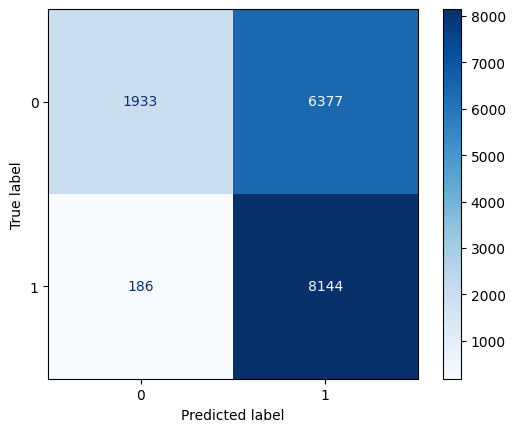

In [110]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)


In [112]:
plt.show()
# Display the plot

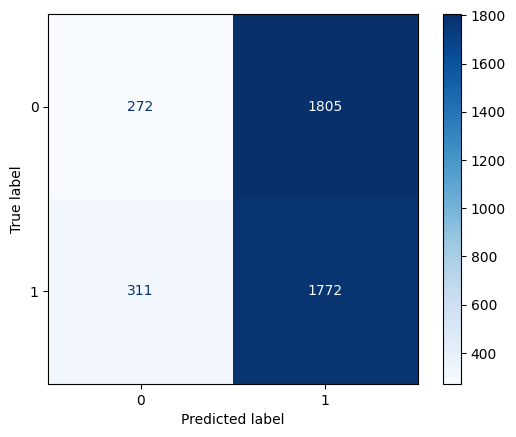

In [111]:
# Generate the confusion matrix
cm = confusion_matrix(ytest,Yttpredict)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)


In [113]:
plt.show()
# Display the plot

# **SUMMARY**

The primary aim of this NLP project is to develop a model that can understand and process human language to achieve specific goals, such as text classification, sentiment analysis, named entity recognition, or machine translation.

** Text Preprocessing:**

* Tokenization: Splitting text into words or subwords.

* Lowercasing: Converting all text to lowercase to ensure uniformity.

* Removal of Punctuation and Special Characters: Cleaning text to focus on meaningful words.


* Stop Words Removal: Removing common, non-informative words.


* Stemming/Lemmatization: Reducing words to their root forms to standardize them.

* vectorization: Vectorization in machine learning refers to the process of converting data into numerical vectors that can be processed by machine learning algorithms.

Vt=TfidfVectorizer()
Vt.fit(x)

 This code Fit the TfidfVectorizer instance to the text data and This step learns the vocabulary and computes the IDF (Inverse Document Frequency) values based on the provided text

 * To evaluate the performance of a classification model, you can calculate several metrics including accuracy, precision, recall, and F1 score. These metrics help to understand different aspects of the model’s performance and are especially useful when dealing with imbalanced datasets.

 overall By using these metrics, you can gain a comprehensive understanding of your model's performance and make informed decisions to improve it.